In [39]:
import numpy as np
import xarray as xr
from shearpy import ShearStressData

import matplotlib.pyplot as plt

In [ ]:
# load the shear stress map
ss = ShearStressData.from_shp("/nfs/annie/cm15ogp/data/shear_stress/eurasia/regions.shp")

In [22]:
# define the model grid
dx = 5000
dy = 5000
x_min = -1265453.0
x_max = 4159547.0
y_min = -4722734.8
y_max = 1352265.2

grid_x = np.arange(x_min, x_max+dx, dx)
grid_y = np.arange(y_min, y_max+dy, dy)
grid_crs = '+ellps=WGS84 +proj=laea +lon_0=0.0 +lat_0=90 +x_0=0.0 +y_0=0.0 +no_defs'


In [26]:
# make the rasterised mask of shear stress regions
mask_layer = ss.to_mask(
    grid_x = grid_x,
    grid_y = grid_y,
    projection = grid_crs
)

In [34]:
# have a look at what layer categories there are
ss.categories

['marine_sediment', 'onshore_sediment', 'bedrock', 'ice_stream']

In [36]:
# assign these categories shear stress values (Pa)
category_vals = {
    'marine_sediment': 10000, 
    'onshore_sediment': 50000, 
    'bedrock': 30000, 
    'ice_stream': 40000
}
raster_layer = mask_layer.to_raster(
    category_vals
)

In [69]:
# optionally apply a gaussian blur to the layer 
# (layer should be re-initialised if the sigma val needs changing)
raster_layer.gauss_blur(sigma=2)

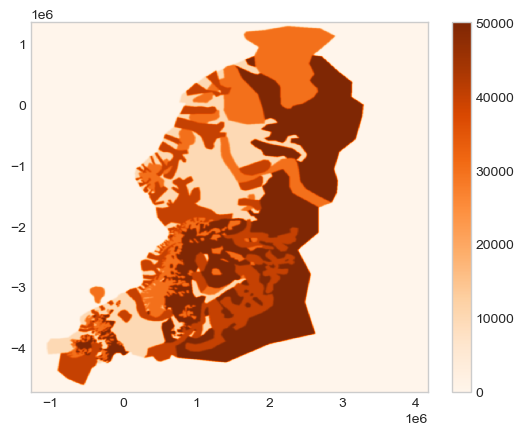

In [71]:
# let's take a look at the results
plt.pcolormesh(
    raster_layer.grid_x,
    raster_layer.grid_y,
    raster_layer.raster,
    cmap="Oranges"
)
plt.colorbar()

In [72]:
# and let's save this out to netcdf
raster_layer.to_netcdf("shearstress.nc")